<div style="text-align: center; font-size: 25px;">
    <span>
        <strong>[010412204101] - Khai thác dữ liệu</strong>
    </span><br>
    <span>
        <strong>Nguyễn Quốc Huy - 22H1120071 - CN22CLCC</strong>
    </span><br>
    <p>
        <strong>Bài tập 3.3</strong>
    </p>
</div>


K-Nearest Neighbors:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        55
           8       0.98      0.98      0.98        43
           9       0.98      0.93      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540


SVC (Linear Kernel):
Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
    

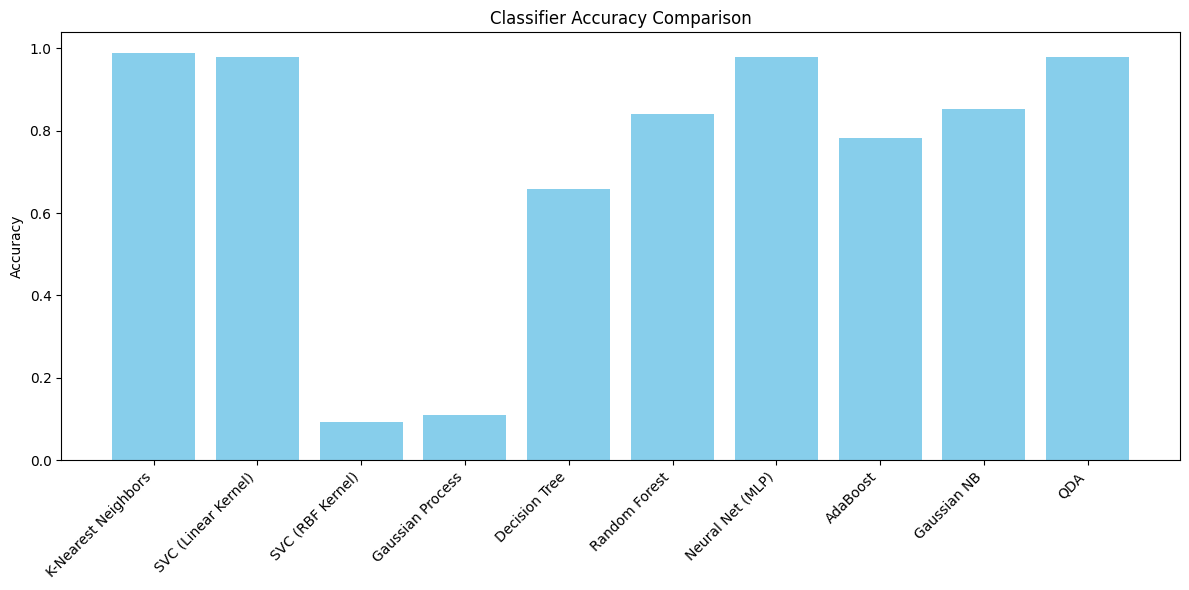

In [6]:
# Import các thư viện cần thiết
import numpy as np  # Thư viện xử lý mảng số học
import matplotlib.pyplot as plt  # Thư viện vẽ đồ thị
from sklearn.datasets import load_digits  # Bộ dữ liệu chữ số
from sklearn.model_selection import train_test_split  # Chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.metrics import classification_report, accuracy_score  # Đánh giá mô hình
from sklearn.neighbors import KNeighborsClassifier  # Thuật toán K-Nearest Neighbors
from sklearn.svm import SVC  # Máy vector hỗ trợ (Support Vector Machine)
from sklearn.gaussian_process import GaussianProcessClassifier  # Phân loại Gaussian Process
from sklearn.gaussian_process.kernels import RBF, ConstantKernel  # Kernel cho Gaussian Process
from sklearn.tree import DecisionTreeClassifier  # Cây quyết định
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # Random Forest và AdaBoost
from sklearn.neural_network import MLPClassifier  # Mạng thần kinh nhân tạo (Multi-Layer Perceptron)
from sklearn.naive_bayes import GaussianNB  # Thuật toán Naive Bayes
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # Phân tích phân biệt bậc hai
import warnings  # Thư viện xử lý cảnh báo
from sklearn.exceptions import ConvergenceWarning  # Cảnh báo về hội tụ
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Tải bộ dữ liệu chữ số (Digits)
digits = load_digits()  
X, y = digits.data, digits.target 

# Chia dữ liệu thành tập huấn luyện (70%) và kiểm tra (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Định nghĩa danh sách các bộ phân loại
classifiers = [
    KNeighborsClassifier(3),  # KNN với k=3
    SVC(kernel="linear", C=0.025, random_state=42),  # SVM kernel tuyến tính
    SVC(gamma=2, C=1, random_state=42),  # SVM kernel RBF
    GaussianProcessClassifier(
        ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3)), random_state=42
    ),  # Gaussian Process với kernel
    DecisionTreeClassifier(max_depth=5, random_state=42),  # Cây quyết định với độ sâu tối đa 5
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),  # Rừng ngẫu nhiên
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),  # Mạng thần kinh (MLP)
    AdaBoostClassifier(random_state=42),  # AdaBoost
    GaussianNB(),  # Naive Bayes Gaussian
    QuadraticDiscriminantAnalysis(reg_param=0.1),  # Phân tích phân biệt bậc hai
]

# Tên các bộ phân loại
classifier_names = [
    "K-Nearest Neighbors",
    "SVC (Linear Kernel)",
    "SVC (RBF Kernel)",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net (MLP)",
    "AdaBoost",
    "Gaussian NB",
    "QDA",
]

# Tạo dictionary lưu kết quả
results = {}

# Huấn luyện và đánh giá từng bộ phân loại
for clf, name in zip(classifiers, classifier_names):
    try:
        clf.fit(X_train, y_train)  # Huấn luyện mô hình
        y_pred = clf.predict(X_test)  # Dự đoán trên tập kiểm tra
        accuracy = accuracy_score(y_test, y_pred)  # Tính độ chính xác
        results[name] = accuracy  # Lưu kết quả
        print(f"\n{name}:")
        print(f"Accuracy: {accuracy:.2f}")  # In độ chính xác
        print(classification_report(y_test, y_pred, zero_division=0))  # Báo cáo phân loại chi tiết
    except Exception as e:
        print(f"\n{name}: Encountered an error - {e}")  # In lỗi nếu có

# Tìm bộ phân loại tốt nhất
best_classifier = max(results, key=results.get)
print("\nBest Classifier:")
print(f"{best_classifier} with accuracy: {results[best_classifier]:.2f}")

# Vẽ biểu đồ so sánh độ chính xác của các bộ phân loại
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='skyblue') 
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.ylabel("Accuracy")  # Nhãn trục Y
plt.title("Classifier Accuracy Comparison")  
plt.tight_layout()  
plt.show()
